In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from sklearn.cluster import KMeans
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
orders  = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\orders.csv')
department = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\departments.csv')
aisles = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\aisles.csv')
products = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\products.csv')
prod_order = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\order_products__train.csv')
prod_order_p = pd.read_csv(r'C:\Users\500060658\Documents\xebia problem\order_products__prior.csv')

In [2]:
orders  = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\orders.csv\orders.csv')
department = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\departments.csv\departments.csv')
aisles = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\aisles.csv\aisles.csv')
products = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\products.csv\products.csv')
prod_order = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\order_products__train.csv\order_products__train.csv')
prod_order_p = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\order_products__prior.csv\order_products__prior.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
prod_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
prod_order_p.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
prod_dept = products.merge(department,how = 'left',on = 'department_id')
prod_dept.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [4]:
product_dept = prod_dept.set_index('product_id').drop(['product_name','aisle_id','department_id'],axis = 1)

In [5]:
product_dept.head()

,department
product_id,
1,snacks
2,pantry
3,beverages
4,frozen
5,pantry


In [6]:
d = {}
for i in product_dept.index:
    d[i] = product_dept['department'][i]

In [7]:
d[29429]

'breakfast'

In [8]:
customer_orders = pd.merge(orders,prod_order,on = 'order_id')

In [9]:
customer_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [10]:
cod = pd.merge(customer_orders,product_dept,how = 'left',on = 'product_id')

In [11]:
cod.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department
0,1187899,1,train,11,4,8,14.0,196,1,1,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,snacks
5,1187899,1,train,11,4,8,14.0,10258,6,1,snacks
6,1187899,1,train,11,4,8,14.0,13032,7,1,breakfast
7,1187899,1,train,11,4,8,14.0,26088,8,1,snacks
8,1187899,1,train,11,4,8,14.0,27845,9,0,dairy eggs
9,1187899,1,train,11,4,8,14.0,49235,10,1,dairy eggs


In [12]:
tdf = pd.crosstab(cod.user_id,cod.department)

In [13]:
tdf.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [14]:
print(tdf.shape)

(131209, 21)


In [15]:
tdf1 = tdf[:100000]

In [16]:
print(tdf1.shape)

(100000, 21)


In [17]:
tdf1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [18]:
X = tdf1
pca = PCA(n_components=5, whiten=True).fit(X)
X_pca = pca.transform(X)

In [19]:
print(pca.components_)

[[-6.34742323e-03  1.56459364e-02  4.31220125e-02  2.30383006e-02
   1.97134049e-02  1.98344836e-03  6.30673676e-02  2.51085725e-01
   4.79826003e-02  4.69938637e-02  7.29774420e-02 -5.39880575e-03
   1.49497934e-02  3.57961970e-02  9.07664806e-03  7.48904893e-04
   7.78226004e-02 -1.20222484e-03 -1.55841243e-03  9.52109527e-01
   7.67095562e-02]
 [-8.58935445e-05  3.54882525e-02  1.04519107e-01  2.60279271e-01
   8.56543437e-02  4.81950076e-06  6.14549889e-02  7.02154139e-01
   8.24221086e-02  8.21105119e-02  2.91376463e-01  5.91194160e-02
   1.38507953e-02  3.31365339e-02  1.41892205e-02  1.72164590e-03
   1.41042308e-01  2.99178614e-02  8.23580324e-03 -2.82970183e-01
   4.59982817e-01]
 [ 4.14598658e-03 -1.38968219e-02 -5.88939861e-03  3.46677367e-01
   2.91156780e-02  1.24299647e-03  1.57784704e-03 -6.11646005e-01
   2.36057831e-02 -3.84206564e-03  1.27501001e-01  4.56758458e-02
   4.25411586e-03 -8.41929978e-03  5.09313441e-03  1.66207853e-03
   1.44589010e-02  2.48945942e-02  4.3

In [20]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.46695757 0.13792631 0.07888572 0.05799728 0.05688577]
0.7986526531618295


In [21]:
w = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    w.append(kmeans.inertia_)

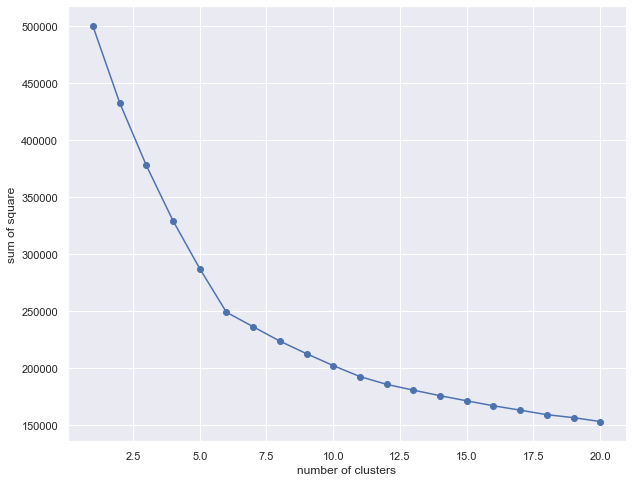

In [23]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),w,marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('sum of square')
plt.show()

In [24]:
fin_cluster =  KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [26]:
fin_cluster.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [27]:
tdf1_cl = pd.concat([tdf1.reset_index(drop =True),pd.DataFrame(X_pca)], axis = 1)
tdf1_cl.columns.values[-5:] = ['component 1','component 2', 'component 3', 'component 4','component 5']
tdf1_cl['segment'] = fin_cluster.labels_

In [28]:
tdf1_cl.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,personal care,pets,produce,snacks,component 1,component 2,component 3,component 4,component 5,segment
0,0,0,0,2,1,0,0,4,0,0,...,0,0,0,3,-0.663997,1.783588,0.057055,-1.595734,0.194727,4
1,0,0,0,0,0,0,3,1,3,0,...,1,0,7,5,1.342467,1.697782,3.168840,6.508304,-3.058717,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,4,0,0.141762,-0.830867,-0.349791,-0.185528,-0.180584,1
3,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,-0.625453,0.253347,0.617070,-0.272031,3.305785,3
4,0,0,1,0,0,0,1,1,1,0,...,0,0,13,0,2.586497,-2.064289,0.153137,-0.194648,-0.082876,2


In [29]:
tdf1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [30]:
tdf1_cl['segment_name'] = tdf1_cl['segment'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})

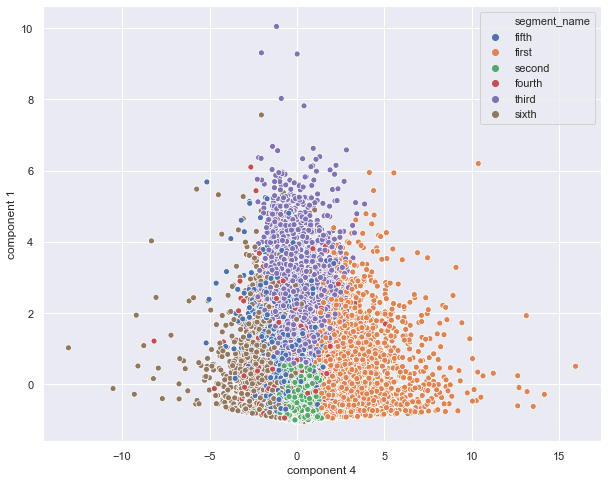

In [31]:
x_axis = tdf1_cl['component 4']
y_axis = tdf1_cl['component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = tdf1_cl['segment_name'],)
plt.show()

In [32]:
data= tdf1_cl.loc[:,'alcohol':'snacks']

In [33]:
data.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
2,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
3,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [34]:
rs = tdf1_cl['segment']

In [35]:
rs.head()

0    4
1    0
2    1
3    3
4    2
Name: segment, dtype: int32

In [36]:
data = pd.concat([data,rs],axis =1)

In [37]:
data.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,segment
0,0,0,0,2,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,3,4
1,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,1,0,7,5,0
2,0,0,0,0,0,0,0,1,0,0,...,2,0,0,0,1,0,0,4,0,1
3,0,0,0,5,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,3
4,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,13,0,2


In [38]:
us = tdf1.index

In [39]:
us = pd.DataFrame(us)

In [40]:
print(data.shape)

(100000, 22)


In [41]:
data = pd.concat([us,data],axis=1)

In [42]:
data.head()

,user_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,segment
0,1,0,0,0,2,1,0,0,4,0,...,0,0,0,0,0,0,0,0,3,4
1,2,0,0,0,0,0,0,3,1,3,...,0,0,0,0,0,1,0,7,5,0
2,5,0,0,0,0,0,0,0,1,0,...,2,0,0,0,1,0,0,4,0,1
3,7,0,0,0,5,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,3
4,8,0,0,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,13,0,2


In [43]:
data = data.drop('user_id',axis =1)

In [44]:
X = data.loc[:,'alcohol':'snacks']
X.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
2,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
3,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [45]:
y = data['segment']
y.head()

0    4
1    0
2    1
3    3
4    2
Name: segment, dtype: int32

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
model200 = Sequential()

In [49]:
model200.add(Dense(4, activation='relu', input_shape=(21,)))

In [50]:
model200.add(Dense(6, activation='softmax'))

In [51]:
model200.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [52]:
model200.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [53]:
history = model200.fit(X_train, y_train, batch_size=100, epochs=20, verbose=2, validation_data=(X_test, y_test))

Train on 80000 samples, validate on 20000 samples
Epoch 1/20
80000/80000 - 4s - loss: 1.4020 - accuracy: 0.5061 - val_loss: 0.8962 - val_accuracy: 0.6780
Epoch 2/20
80000/80000 - 2s - loss: 0.6687 - accuracy: 0.7638 - val_loss: 0.5299 - val_accuracy: 0.8069
Epoch 3/20
80000/80000 - 2s - loss: 0.4671 - accuracy: 0.8315 - val_loss: 0.4297 - val_accuracy: 0.8440
Epoch 4/20
80000/80000 - 2s - loss: 0.3987 - accuracy: 0.8561 - val_loss: 0.3865 - val_accuracy: 0.8644
Epoch 5/20
80000/80000 - 2s - loss: 0.3650 - accuracy: 0.8742 - val_loss: 0.3619 - val_accuracy: 0.8773
Epoch 6/20
80000/80000 - 2s - loss: 0.3442 - accuracy: 0.8850 - val_loss: 0.3468 - val_accuracy: 0.8838
Epoch 7/20
80000/80000 - 2s - loss: 0.3297 - accuracy: 0.8909 - val_loss: 0.3354 - val_accuracy: 0.8863
Epoch 8/20
80000/80000 - 2s - loss: 0.3193 - accuracy: 0.8936 - val_loss: 0.3281 - val_accuracy: 0.8881
Epoch 9/20
80000/80000 - 2s - loss: 0.3114 - accuracy: 0.8948 - val_loss: 0.3228 - val_accuracy: 0.8874
Epoch 10/20
80

In [54]:
testing = tdf[100000:100100]

In [55]:
testing.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
157391,0,0,0,1,0,0,0,2,0,0,...,0,0,1,0,0,1,0,0,3,2
157394,0,0,1,1,1,0,2,2,1,1,...,0,0,1,0,0,1,0,0,1,1
157397,0,0,0,2,1,0,0,6,1,0,...,0,0,0,0,0,1,0,0,2,2
157398,0,0,0,0,0,0,2,0,0,1,...,0,0,1,0,0,1,0,0,7,0
157399,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,2,0,0,8,1


In [56]:
testi = testing.reset_index()

In [57]:
testi.tail()

department,user_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
95,157545,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
96,157550,0,0,0,0,2,0,1,1,2,...,0,0,0,0,0,2,0,0,9,1
97,157551,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
98,157552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99,157553,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
temp1 = {}

In [59]:
for x in range(0,100):
    y = 0
    check = testi[x:x+1]
    check1 = check.drop('user_id',axis =1)
    predicted = model200.predict(check1).argmax()
    temp1[check.iloc[y]['user_id']] = predicted
    y = y+1

In [60]:
temp1

{157391: 2,
 157394: 0,
 157397: 4,
 157398: 2,
 157399: 2,
 157400: 4,
 157404: 2,
 157406: 2,
 157408: 1,
 157409: 2,
 157410: 5,
 157411: 2,
 157412: 3,
 157413: 2,
 157414: 2,
 157415: 2,
 157418: 2,
 157420: 0,
 157421: 4,
 157422: 0,
 157423: 3,
 157424: 5,
 157425: 5,
 157427: 2,
 157431: 5,
 157432: 2,
 157433: 3,
 157434: 4,
 157439: 1,
 157441: 4,
 157442: 2,
 157444: 4,
 157447: 1,
 157448: 5,
 157449: 2,
 157452: 2,
 157453: 4,
 157455: 2,
 157457: 4,
 157458: 2,
 157462: 5,
 157463: 2,
 157464: 4,
 157466: 4,
 157467: 5,
 157468: 2,
 157469: 2,
 157470: 2,
 157472: 1,
 157473: 4,
 157475: 5,
 157476: 3,
 157479: 2,
 157480: 3,
 157483: 0,
 157485: 2,
 157486: 0,
 157487: 2,
 157490: 3,
 157493: 0,
 157495: 3,
 157496: 5,
 157497: 3,
 157498: 0,
 157499: 2,
 157500: 5,
 157501: 4,
 157503: 2,
 157504: 5,
 157505: 4,
 157506: 2,
 157508: 1,
 157509: 2,
 157510: 4,
 157511: 0,
 157512: 4,
 157517: 4,
 157520: 2,
 157521: 2,
 157523: 1,
 157524: 5,
 157525: 3,
 157526: 5,
 157

In [61]:
print(data.shape)

(100000, 22)


In [62]:
first = data[data['segment']==0].drop('segment',axis=1)
second = data[data['segment']==1].drop('segment',axis=1)
third = data[data['segment']==2].drop('segment',axis=1)
fourth = data[data['segment']==3].drop('segment',axis=1)
fifth = data[data['segment']==4].drop('segment',axis=1)
sixth = data[data['segment']==5].drop('segment',axis=1)

In [72]:
group1 = pd.DataFrame(first.sum(axis =0).sort_values(ascending = False), columns = ['Aggregate'])
group1.head()

,Aggregate
frozen,29759
produce,21966
dairy eggs,14875
snacks,8525
pantry,7217


In [86]:
group1 = group1[0:10]
group1 = group1.reset_index()

In [87]:
group1.head()

,index,Aggregate
0,frozen,29759
1,produce,21966
2,dairy eggs,14875
3,snacks,8525
4,pantry,7217


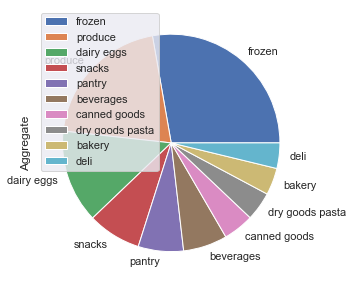

In [84]:
plot = group1.plot.pie(y='Aggregate', figsize=(5, 5))

            product  Aggregate
1            frozen      29759
2           produce      21966
3        dairy eggs      14875
4            snacks       8525
5            pantry       7217
6         beverages       7022
7      canned goods       4875
8   dry goods pasta       4585
9            bakery       4292
10             deli       4058


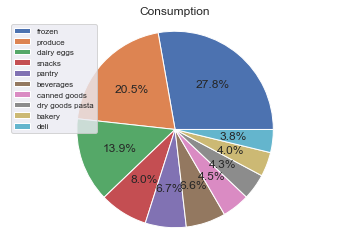

In [133]:
group1.index = np.arange(1, len(group3) + 1)
group1.rename(columns={'index':'product'}, inplace= True)
print(group1)
plt.pie(group1['Aggregate'], autopct='%1.1f%%')
plt.title('Consumption')
plt.legend(labels=group1['product'], prop={'size': 8}, loc="best")
plt.axis('equal')
plt.show()

In [95]:
second.sum(axis =0).sort_values(ascending = False)

produce            80692
dairy eggs         36095
beverages          25122
pantry             21085
snacks             20998
frozen             17416
household          12165
bakery             11745
canned goods       10628
deli               10377
dry goods pasta     8470
personal care       7590
meat seafood        7565
breakfast           6974
babies              3513
international       2906
alcohol             2755
missing             1859
pets                1492
other                566
bulk                 365
dtype: int64

        product  Aggregate
0       produce      80692
1    dairy eggs      36095
2     beverages      25122
3        pantry      21085
4        snacks      20998
5        frozen      17416
6     household      12165
7        bakery      11745
8  canned goods      10628
9          deli      10377


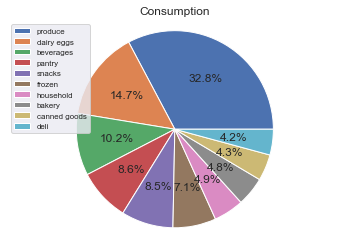

In [131]:
group2 = pd.DataFrame(second.sum(axis =0).sort_values(ascending = False), columns = ['Aggregate'])
group2 = group2[0:10]
group2 = group2.reset_index()
#group2.index = np.arange(1, len(group2) + 1)
group2.rename(columns={'index':'product'}, inplace= True)
print(group2)
plt.pie(group2['Aggregate'], autopct='%1.1f%%')
plt.title('Consumption')
plt.legend(labels=group2['product'], prop={'size': 8}, loc="best")
plt.axis('equal')
plt.show()

In [102]:
third.sum(axis =0).sort_values(ascending = False)

produce            121480
dairy eggs          24442
pantry              10821
snacks               9567
frozen               8673
beverages            8397
canned goods         7969
deli                 6030
bakery               5646
dry goods pasta      5398
meat seafood         4997
breakfast            2720
household            2326
international        1990
babies               1719
personal care        1534
missing              1200
bulk                  302
pets                  204
other                 191
alcohol               132
dtype: int64

            product  Aggregate
1           produce     121480
2        dairy eggs      24442
3            pantry      10821
4            snacks       9567
5            frozen       8673
6         beverages       8397
7      canned goods       7969
8              deli       6030
9            bakery       5646
10  dry goods pasta       5398


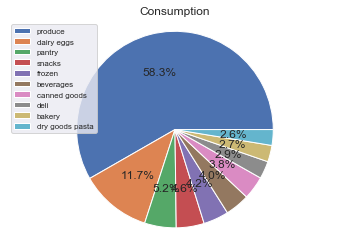

In [132]:
group3 = pd.DataFrame(third.sum(axis =0).sort_values(ascending = False), columns = ['Aggregate'])
group3 = group3[0:10]
group3 = group3.reset_index()
group3.index = np.arange(1, len(group3) + 1)
group3.rename(columns={'index':'product'}, inplace= True)
print(group3)
plt.pie(group3['Aggregate'], autopct='%1.1f%%')
plt.title('Consumption')
plt.legend(labels=group3['product'], prop={'size': 8}, loc="best")
plt.axis('equal')
plt.show()

In [66]:
fourth.sum(axis =0).sort_values(ascending = False)

beverages          28904
produce            17098
dairy eggs         11519
snacks              7484
pantry              4715
frozen              4523
household           3914
bakery              2923
deli                2548
canned goods        2381
breakfast           2000
personal care       1980
dry goods pasta     1952
meat seafood        1543
babies               668
international        616
missing              585
alcohol              425
pets                 413
other                131
bulk                  60
dtype: int64

In [67]:
fifth.sum(axis =0).sort_values(ascending = False)

dairy eggs         65585
produce            50141
pantry             12379
snacks             11628
beverages          10222
frozen             10097
bakery              8536
deli                7043
canned goods        6892
dry goods pasta     6512
breakfast           4861
meat seafood        4647
household           3939
babies              2978
personal care       2277
international       1594
missing             1211
pets                 492
alcohol              355
other                221
bulk                 157
dtype: int64

In [134]:
sixth.sum(axis =0).sort_values(ascending = False)

snacks             32486
produce            19970
dairy eggs         13531
beverages           7190
frozen              5876
pantry              5635
deli                3758
bakery              3655
breakfast           3262
dry goods pasta     2698
canned goods        2641
household           2580
meat seafood        1748
personal care       1514
babies              1138
international        815
missing              637
alcohol              331
pets                 311
other                127
bulk                  98
dtype: int64

In [135]:
days= orders[['user_id','order_dow']]

In [136]:
days.head(10)

,user_id,order_dow
0,1,2
1,1,3
2,1,3
3,1,4
4,1,4
5,1,2
6,1,1
7,1,1
8,1,1
9,1,4


In [137]:
days.shape

(3421083, 2)

In [138]:
famous_day= pd.crosstab(days['user_id'], days['order_dow'])
famous_day.head(10)

order_dow,0,1,2,3,4,5,6
user_id,,,,,,,
1,0,3,2,2,4,0,0
2,0,6,5,2,1,1,0
3,6,2,1,3,0,1,0
4,0,0,0,1,2,2,1
5,2,1,0,2,0,0,0
6,0,0,1,1,1,1,0
7,6,5,3,4,0,2,1
8,0,2,0,0,0,1,1
9,1,1,0,0,0,1,1


In [139]:
famous_day.shape

(206209, 7)

In [140]:
#famous_day = famous_day[0:132000]

In [141]:
#famous_day.shape

In [142]:
famous_day_12= famous_day.rename(columns={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [143]:
famous_day_12.head(10)

order_dow,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_id,,,,,,,
1,0,3,2,2,4,0,0
2,0,6,5,2,1,1,0
3,6,2,1,3,0,1,0
4,0,0,0,1,2,2,1
5,2,1,0,2,0,0,0
6,0,0,1,1,1,1,0
7,6,5,3,4,0,2,1
8,0,2,0,0,0,1,1
9,1,1,0,0,0,1,1


In [144]:
X1= famous_day_12

In [145]:
w = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    w.append(kmeans.inertia_)

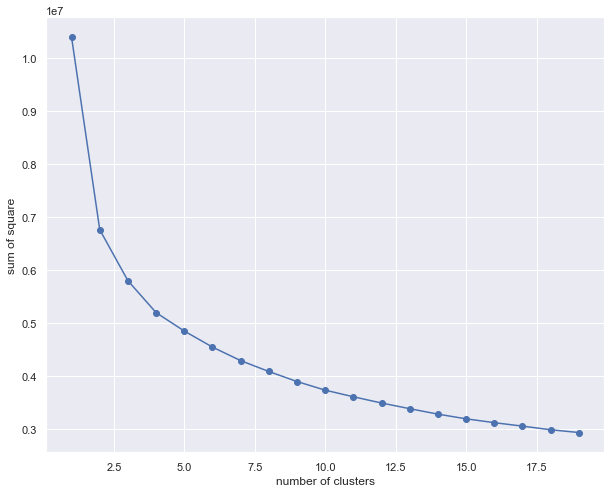

In [92]:
plt.figure(figsize = (10,8))
plt.plot(range(1,20),w,marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('sum of square')
plt.show()

In [149]:
final_cluster =  KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
final_cluster.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [150]:
X1.head()

order_dow,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_id,,,,,,,
1,0,3,2,2,4,0,0
2,0,6,5,2,1,1,0
3,6,2,1,3,0,1,0
4,0,0,0,1,2,2,1
5,2,1,0,2,0,0,0


In [151]:
X1['segment'] = final_cluster.labels_

In [152]:
X1 .head()

order_dow,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,segment
user_id,,,,,,,,
1,0,3,2,2,4,0,0,0
2,0,6,5,2,1,1,0,0
3,6,2,1,3,0,1,0,5
4,0,0,0,1,2,2,1,0
5,2,1,0,2,0,0,0,0


In [153]:
X1.segment.nunique()

6

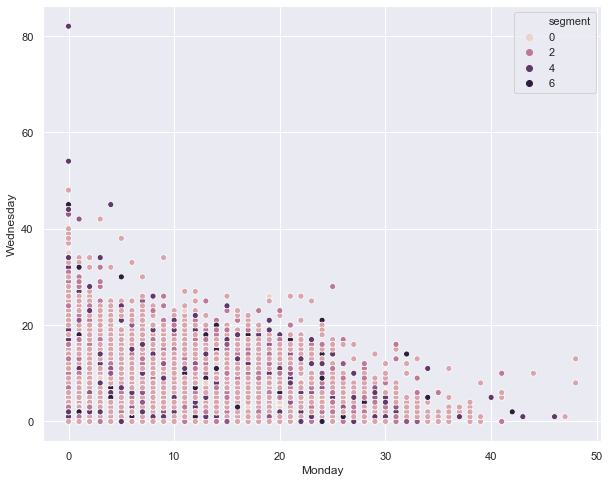

In [129]:
x_axis = famous_days_1['Monday']
y_axis = famous_days_1['Wednesday']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = X1['segment'])
plt.show()

In [154]:
cust_day = X1.filter(['user_id', 'segment'])

In [155]:
cust_day.head()

order_dow,segment
user_id,
1,0
2,0
3,5
4,0
5,0


In [156]:
cust_day.shape

(206209, 1)

In [157]:
temp3 = pd.DataFrame.from_dict(temp1, orient = 'index', columns = ['Depatment_segment'])

In [158]:
temp3.tail()

,Depatment_segment
157545,1
157550,2
157551,1
157552,1
157553,4


In [159]:
temp4 = cust_day[157390:157553]

In [160]:
temp4.rename(columns = {'segment':'dow_segment'})
temp4.tail()

order_dow,segment
user_id,
157549,4
157550,0
157551,0
157552,0
157553,0


In [161]:
fianl_result = pd.concat([temp3, temp4], axis = 1)

In [162]:
fianl_result

,Depatment_segment,segment
157391,2.0,0
157392,NaN,0
157393,NaN,1
157394,0.0,0
157395,NaN,0
...,...,...
157549,NaN,4
157550,2.0,0
157551,1.0,0
157552,1.0,0


### predicting for a product

In [163]:
d1 = {}
d1 = first.sum(axis = 0).sort_values(ascending = False)

d2 ={}
d2 = second.sum(axis = 0).sort_values(ascending = False)

d3 = {}
d3 = third.sum(axis =0).sort_values(ascending = False)

d4 = {}
d4 = fourth.sum(axis =0).sort_values(ascending = False)

d5 = {}
d5 = fifth.sum(axis =0).sort_values(ascending = False)

d6 = {}
d6 = sixth.sum(axis =0).sort_values(ascending = False)


In [164]:
los = [d1,d2,d3,d4,d5,d6]

In [165]:
def t_marketing(it):
    dep = d[item]
    m = 0
    no = -1
    for i in los:
        no = no+1
        if m<i[dep]:
            m = i[dep]
            segno = no
    list_of_customers = []
    for key in temp1:
        if temp1[key] == segno:
            list_of_customers.append(key)
    return list_of_customers

In [166]:
item = int(input("enter the product id : "))

loc = t_marketing(item)

enter the product id : 2


In [167]:
loc

[157408,
 157439,
 157447,
 157472,
 157508,
 157523,
 157536,
 157540,
 157545,
 157551,
 157552]

In [217]:
temp4

order_dow,segment
user_id,
157391,0
157392,0
157393,1
157394,0
157395,0
...,...
157549,4
157550,0
157551,0


In [218]:
temp4.index

Int64Index([157391, 157392, 157393, 157394, 157395, 157396, 157397, 157398,
            157399, 157400,
            ...
            157544, 157545, 157546, 157547, 157548, 157549, 157550, 157551,
            157552, 157553],
           dtype='int64', name='user_id', length=163)

In [231]:
tester = []

In [236]:
for i in loc:
    check = temp4.loc[i]
    tester.append(check)

In [238]:
tester[0]

order_dow
segment    0
Name: 157408, dtype: int32